# C4W2_quiz_3

In [1]:
import numpy as np
import pandas as pd
import itertools
import statistics

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Task 1

Какую из этих гипотез нельзя проверить с помощью критерия знаков?

- Гипотеза о равенстве средних двух независимых выборок

## Task 2

Какую из этих гипотез о средних двух независимых выборок проверяет критерий Манна-Уитни?

- H0​: FX1​​(x)=FX2​​(x) против H1 ⁣:FX1(x)=FX2(x+Δ),Δ<≠>0H_1\colon F_{X_1}(x) = F_{X_2}(x+\Delta), \Delta<\neq>0H1​:FX1​​(x)=FX2​​(x+Δ),Δ<​=>0

## Task 3

У вас есть две регрессионные модели и двадцать наборов данных. На обучающей подвыборке каждого набора вы настраиваете обе модели и считаете среднеквадратичную ошибку на тестовой подвыборке набора. Какими из этих критериев не стоит проверять гипотезу о том, что среднее качество регрессионных моделей одинаково?

- Критерии для не сязаных выборок

## Task 4

Давайте вернёмся к данным выживаемости пациентов с лейкоцитарной лимфомой из видео про критерий знаков:

49,58,75,110,112,132,151,276,281,362∗

Измерено остаточное время жизни с момента начала наблюдения (в неделях); звёздочка обозначает цензурирование сверху — исследование длилось 7 лет, и остаточное время жизни одного пациента, который дожил до конца наблюдения, неизвестно.

Поскольку цензурировано только одно наблюдение, для проверки гипотезы $H0 : medX=200 H_0 \colon med X = 200  H0​: medX=200$ на этих данных можно использовать критерий знаковых рангов — можно считать, что время дожития последнего пациента в точности равно 362, на ранг этого наблюдения это никак не повлияет. 

Критерием знаковых рангов проверьте эту гипотезу против двусторонней альтернативы, введите достигаемый уровень значимости, округлённый до четырёх знаков после десятичной точки.

In [3]:
sample = np.array([49,58,75,110,112,132,151,276,281,362])

In [4]:
print('95%% confidence interval for the mean time: [%f, %f]' % zconfint(sample))

95% confidence interval for the mean time: [93.808829, 227.391171]


In [90]:
mu = 200
print('Критерий знаковых ранговых  Wilcoxon: \n{}'.format(stats.wilcoxon(sample - mu)))
print('\nСреднее значение: \n{}'.format(sample.mean()))

Критерий знаковых ранговых  Wilcoxon: 
WilcoxonResult(statistic=17.0, pvalue=0.322265625)

Среднее значение: 
160.6


In [14]:
long_life = np.array([49,58,75,110,112,132,151,276,281,362])
mu = 200
print(long_life-mu)
stats.wilcoxon(long_life-mu,alternative='two-sided')

[-151 -142 -125  -90  -88  -68  -49   76   81  162]


WilcoxonResult(statistic=17.0, pvalue=0.322265625)

- Ответ должен быть: 0.2845

## Task 5

В ходе исследования влияния лесозаготовки на биоразнообразие лесов острова Борнео собраны данные о количестве видов деревьев в 12 лесах, где вырубка не ведётся:

22,22,15,13,19,19,18,20,21,13,13,15,

и в 9 лесах, где идёт вырубка:

17,18,18,15,12,4,14,15,10.
Проверьте гипотезу о равенстве среднего количества видов в двух типах лесов против односторонней альтернативы о снижении биоразнообразия в вырубаемых лесах. Используйте ранговый критерий. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

In [26]:
trees_no_cut = np.array([22,22,15,13,19,19,18,20,21,13,13,15])
trees_with_cut = np.array([17,18,18,15,12,4,14,15,10])

print('Двувыборочный критерий знаковых рангов Манна-Уитни для независимых выборок: \n{}'.format(stats.mannwhitneyu(trees_no_cut, trees_with_cut)))

Двувыборочный критерий знаковых рангов Манна-Уитни для независимых выборок: 
MannwhitneyuResult(statistic=27.0, pvalue=0.02900499272087373)


- Ответ должен быть: 0.0290

## Task 6

28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец.

С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:

   - установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
   - сделайте по 1000 псевдовыборок из каждой выборки.

In [15]:
data = pd.read_csv('challenger.txt', delimiter='\t')
data.head()

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


In [16]:
incident = data[data['Incident']  == 1].Temperature
no_incident = data[data['Incident']  == 0].Temperature

In [22]:
incident.values

array([21.1, 13.9, 17.2, 21.1, 11.7, 23.9, 14.4])

In [17]:
no_incident.values

array([18.9, 20.6, 20. , 19.4, 22.2, 22.8, 21.1, 25.6, 19.4, 19.4, 23.9,
       21.1, 27.2, 24.4, 26.1, 24.4])

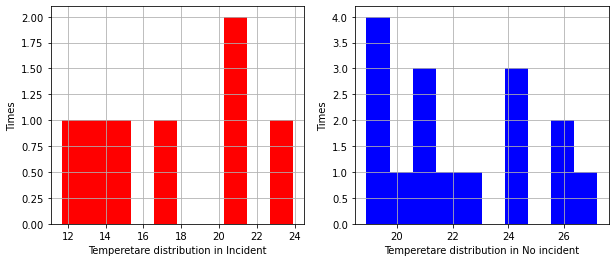

In [24]:
pylab.figure(figsize=(10,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(incident, color = 'r')
pylab.xlabel('Temperetare distribution in Incident')
pylab.ylabel('Times')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(no_incident, color = 'b')
pylab.xlabel('Temperetare distribution in No incident')
pylab.ylabel('Times')

pylab.show()

In [43]:
print('95%% confidence interval for the mean: {}'.format(zconfint(incident)))

95%% confidence interval for the mean: (14.258978339107285, 20.969593089464148)


In [44]:
print('95%% confidence interval for the mean: {}'.format(zconfint(no_incident)))

95%% confidence interval for the mean: (20.961457789002573, 23.601042210997427)


In [25]:
print(np.random.randint(low=0, high=20, size=(3, 5)))

[[ 4  4  7  1  3]
 [ 6  4  9 17 12]
 [ 5 11 16 14 12]]


In [26]:
def get_bootstrap_samples(data, number_of_samples):
    indexes = np.random.randint(low=0, high=len(data), size=(number_of_samples, len(data)))
    samples = data[indexes]
    return samples
    

In [27]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [57]:
np.random.seed(0)
incident_mean = np.array(get_bootstrap_samples(incident.values, 1000).mean(axis=1))
no_incident_mean = np.array(get_bootstrap_samples(no_incident.values, 1000).mean(axis=1))

In [58]:
delta_median_score = no_incident_mean - incident_mean

In [59]:
print('95%% confidence interval for times decrease of infarction: {}'.format(str(stat_intervals(incident_mean - no_incident_mean, 0.05))))

95%% confidence interval for times decrease of infarction: [-8.06457589 -1.45040179]


- Ответ должен быть: -1.4504

## Task 7

На данных предыдущей задачи проверьте гипотезу об одинаковой средней температуре воздуха в дни, когда уплотнительный кольца повреждались, и дни, когда повреждений не было. Используйте перестановочный критерий и двустороннюю альтернативу. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки. 

Чтобы получить такое же значение, как мы:

   - установите random seed = 0;
   - возьмите 10000 перестановок.

- Ответ должен быть: 0.0290

In [60]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [67]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [68]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [69]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [77]:
np.random.seed(0)
print("p-value: {}".format(permutation_test(incident.values, no_incident.values, max_permutations = 10000)))

p-value: 0.0057


- Ответ должен быть: 0.0070